[Numpy Basics](https://github.com/m3m0ry/numpy-basics)

# numpy - Blas's speed at Python's convenience
- THE package for scientific computing
- provides fast operatations on multidimensional arrays
- basis of many scientific packages: scipy, matplotlib, opencv, tensorflow, ...
- drop in replacements: cupy, nclpy, ...

In [1]:
import numpy as np

In [15]:
# questions

42

## Simple speed comparison

In [3]:
L = range(10000)
%timeit [i**2 for i in L]

1.89 ms ± 22.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
a = np.arange(10000)
%timeit a**2

3.74 µs ± 127 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## np.ndarray
- fixed size
- [fixed datatype](https://numpy.org/doc/stable/reference/arrays.scalars.html#arrays-scalars-built-in): (float64, float32, int32, uint64, ...)
- [Array Creation](https://numpy.org/doc/stable/user/basics.creation.html)

Lists of integers and floats

In [14]:
a = np.array([0, 1, 2, 3])
print(f'{a=}')
print(f'{a.dtype=}')
print(f'{a.size=}')
print(f'{a.itemsize=}')

a=array([0, 1, 2, 3])
a.dtype=dtype('int64')
a.size=4
a.itemsize=8


In [6]:
b = np.array([0.0, 1.1, 2.2, 3.3])
print(f'{b=}')
print(f'{b.dtype=}')
print(f'{b.size=}')
print(f'{b.itemsize=}')

b=array([0. , 1.1, 2.2, 3.3])
b.dtype=dtype('float64')
b.size=4
b.itemsize=8


Mixed List and Fixed Type

In [7]:
a = np.array([0, 1, 2.2, 3.3])
print(f'{a=}')
print(f'{a.dtype=}')
print(f'{a.size=}')
print(f'{a.itemsize=}')

a=array([0. , 1. , 2.2, 3.3])
a.dtype=dtype('float64')
a.size=4
a.itemsize=8


In [8]:
b = np.array([0, 1, 2.2, 3.3], dtype=np.int8)
print(f'{b=}')
print(f'{b.dtype=}')
print(f'{b.size=}')
print(f'{b.itemsize=}')

b=array([0, 1, 2, 3], dtype=int8)
b.dtype=dtype('int8')
b.size=4
b.itemsize=1


Range & linspace

In [23]:
np.arange(2.05, 2.5, 0.1)

array([2.05, 2.15, 2.25, 2.35, 2.45])

In [24]:
np.linspace(2.05, 2.5, 5)

array([2.05  , 2.1625, 2.275 , 2.3875, 2.5   ])

2D Arrays: eye, diag, vander

nD Arrays: zeros, ones, random.rand, fromfunction, ...

In [11]:
np.zeros((3,3))

a=array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])
a.dtype=dtype('float64')
a.size=9
a.itemsize=8


In [25]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [26]:
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [76]:
np.arange(9).reshape(3,3).shape

(3, 3)

## Array handling
### Indexing, slicing, masks, views, ...
- [Slicing and Indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html#basic-slicing-and-indexing)

### Indexing

In [27]:
a = np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [28]:
a[0,0]

4

In [29]:
a[-1,-1]

8

In [30]:
a[1,1] == a[-2,-2]

True

### Slicing

In [34]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [31]:
a[1:,1:]

array([[4, 5],
       [7, 8]])

In [35]:
a[:, :1]

array([[0],
       [3],
       [6]])

In [42]:
a[0]

array([0, 1, 2])

In [33]:
a[::2, 1::2]

array([[1],
       [7]])

### Index Array

In [36]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [59]:
a[np.array([[0, 2]]), np.array([[1, 1]])]

array([[1, 7]])

## Mask

In [60]:
a > 5

array([[False, False, False],
       [False, False, False],
       [ True,  True,  True]])

In [61]:
a[a>5]

array([6, 7, 8])

### Newaxis

In [62]:
b = np.array([1,2,3])
b

array([1, 2, 3])

In [63]:
b[:, np.newaxis]

array([[1],
       [2],
       [3]])

## Ellipsis

In [66]:
c = np.arange(81).reshape(3,3,3,3)

In [67]:
c[...,0,0]

array([[ 0,  9, 18],
       [27, 36, 45],
       [54, 63, 72]])

In [70]:
np.all(c[..., 0, 0] == c[:, :, 0, 0])

True

## Numpy's Pitfalls
- Views don't copy
- Types (arange)
- Automatic type casting (int, float)

TODO, math(never do forloops), copy


Stuff to Avoid

NumPy has some cruft left over due to backwards compatibility. There are some edge cases when you would (maybe) use these things (but probably not). In general, avoid them:

    np.chararray: use an np.ndarray with unicode dtype
    np.MaskedArrays: use a boolean advanced index
    np.matrix: use a 2-dimensional np.ndarray



In [ ]:
# Not mentioned
#np.sort, np.unique
#Array composition and decomposition np.split, np.stack
#Reductions many-to-1 np.sum, np.prod, np.count_nonzero

# scipy

# matplotlib

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

TODO description

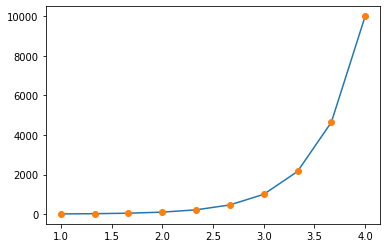

In [89]:
plt.plot(np.linspace(1, 4, 10), np.logspace(1, 4, 10))
#plt.show()
plt.plot(np.linspace(1, 4, 10), np.logspace(1, 4, 10), 'o')
plt.show()

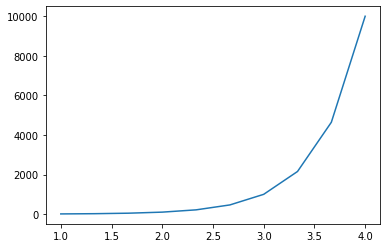

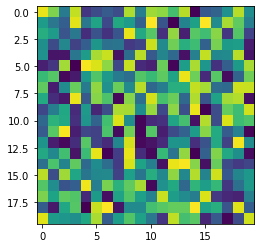

In [86]:
plt.imshow(np.random.rand(20,20))
plt.show()

Putting it together (some example with numpy and matplotlib, smoothing? jacobi?)

## Further Resources
- [Docs](https://numpy.org/doc/stable/index.html)
- [Reference](https://numpy.org/doc/stable/reference/index.html#reference)
- [Scipy Lecture Notes](http://scipy-lectures.org/)
- [From Python to Numpy/](https://www.labri.fr/perso/nrougier/from-python-to-numpy/)